In [1]:
import pandas as pd
file_path= 'C:/Users/ramya/OneDrive/Desktop/dataMining/tennis.csv'
df=pd.read_csv('C:/Users/ramya/OneDrive/Desktop/dataMining/tennis.csv')
df.head()
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 14
Number of columns: 5


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Define preprocessing steps for categorical columns
categorical_columns = ['Outlook', 'Temperature', 'Humidity', 'Windy']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor that applies the transformation to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a pipeline with preprocessing and the DecisionTreeClassifier
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Fit the classifier to the data
clf.fit(X, y)

# Make a prediction on new data
new_data = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Hot'],
    'Humidity': ['High'],
    'Windy': ['No']
})

prediction = clf.predict(new_data)

print("Prediction:", prediction)


Prediction: ['No']


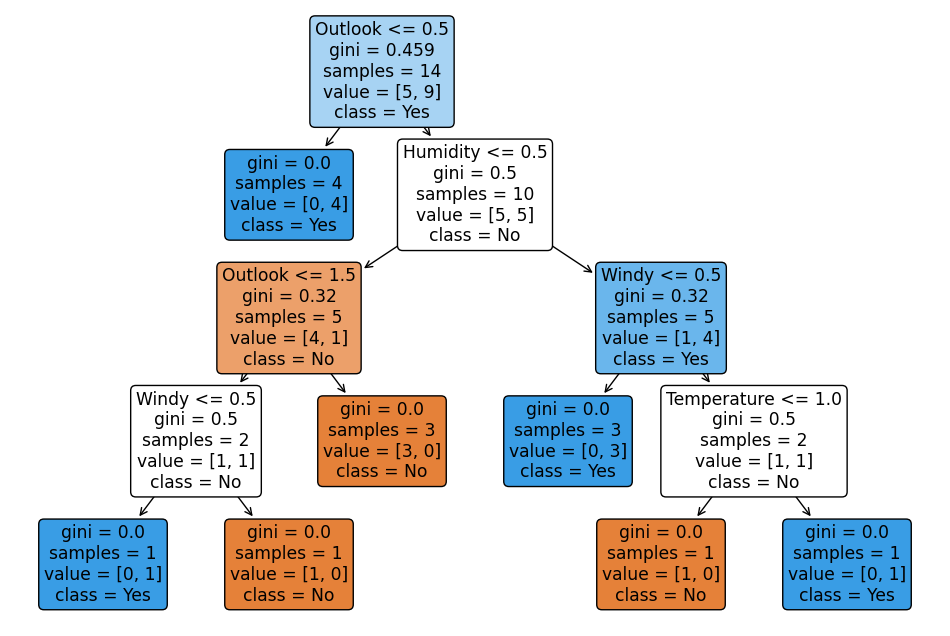

In [3]:
import matplotlib.pyplot as plt
label_encoders = {}
categorical_columns = ['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features (X) and target (y)
X = df.drop('Play', axis=1)
y = df['Play']

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree

# Convert the index to a list for feature_names parameter
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()








#QUESTION 2(b)

In [4]:
import pandas as pd
import math


# Function to calculate entropy of a set
def entropy(df):
    entropy = 0
    total_count = len(df)
    
    # Count the number of each class
    counts = df['Play'].value_counts()
    
    # Calculate entropy using the formula: -p*log2(p)
    for count in counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)
    
    return entropy

# Function to calculate Information Gain for an input attribute
def information_gain(df, input_attribute, output_attribute='Play'):
    # Calculate the total entropy before the split
    total_entropy = entropy(df)
    
    # Calculate weighted average entropy after the split
    values = df[input_attribute].unique()
    weighted_entropy = 0
    
    for value in values:
        subset = df[df[input_attribute] == value]
        subset_entropy = entropy(subset)
        weight = len(subset) / len(df)
        weighted_entropy += weight * subset_entropy
    
    # Calculate Information Gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Calculate Information Gain for each input attribute with respect to the output attribute
input_attributes = df.columns.tolist()[:-1]  # Exclude the output attribute ('PlayTennis')
information_gains = {}

for input_attribute in input_attributes:
    ig = information_gain(df, input_attribute)
    information_gains[input_attribute] = ig

print("Information Gains for each input attribute with respect to Play:")
for attribute, ig in information_gains.items():
    print(f"{attribute}: {ig}")


Information Gains for each input attribute with respect to Play:
Outlook: 0.24674981977443933
Temperature: 0.02922256565895487
Humidity: 0.15183550136234159
Windy: 0.04812703040826949


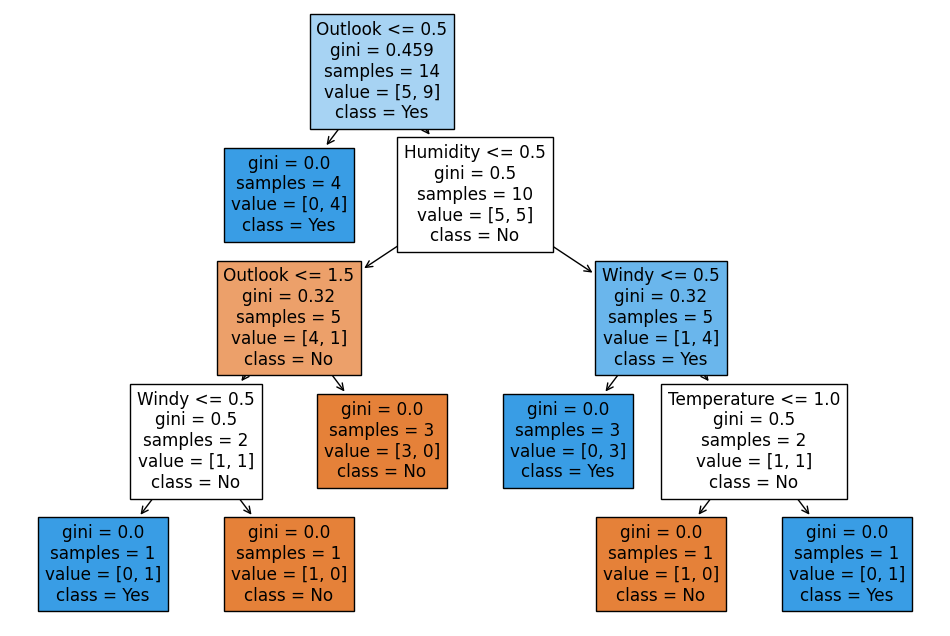

In [36]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your dataset file)

# Separate features (X) and target variable (y)
X = df.drop(columns=['Play'])  # Replace 'TargetColumnName' with the actual target column name
y = df['Play']

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the decision tree on the full dataset
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'])
plt.show()


Confusion Matrix:
[[3 2]
 [1 4]]


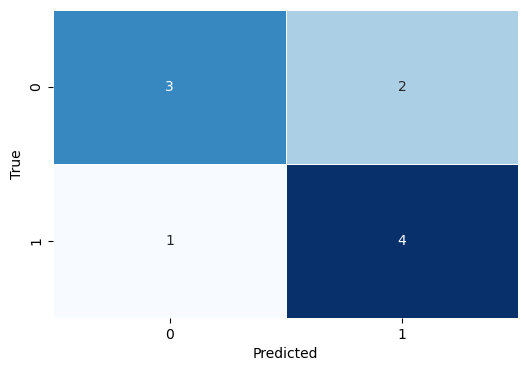

True Positives (TP): 4
True Negatives (TN): 3
False Positives (FP): 2
False Negatives (FN): 1
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727272
True Positive Rate (TPR): 0.8
False Positive Rate (FPR): 0.4
Specificity: 0.6
Negative Predictive Value (NPV): 0.75


In [6]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# True labels (ground truth)
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]

# Predicted labels (model's predictions)
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]


# Generate and print the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show() 

tn, fp, fn, tp = confusion.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(true_labels, predicted_labels)
print("F1 Score:", f1)


# Calculate True Positive Rate (TPR) or Sensitivity
tpr = tp / (tp + fn)
print("True Positive Rate (TPR):", tpr)

# Calculate False Positive Rate (FPR)
fpr = fp / (fp + tn)
print("False Positive Rate (FPR):", fpr)

# Calculate Specificity
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# Calculate Negative Predictive Value (NPV)
npv = tn / (tn + fn)
print("Negative Predictive Value (NPV):", npv)

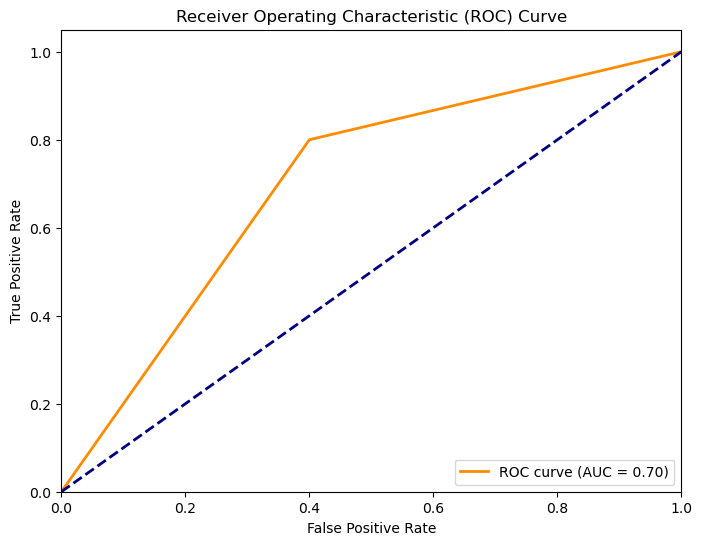

ROC AUC: 0.7000000000000001


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier with a specific max_depth
clf = DecisionTreeClassifier(max_depth=3)

# Fit the decision tree on the training data
clf.fit(X_train, y_train)

# Define your true labels and predicted labels
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]
  # You can change 3 to your desired depth
# Calculate the ROC AUC score
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print('ROC AUC:', roc_auc)


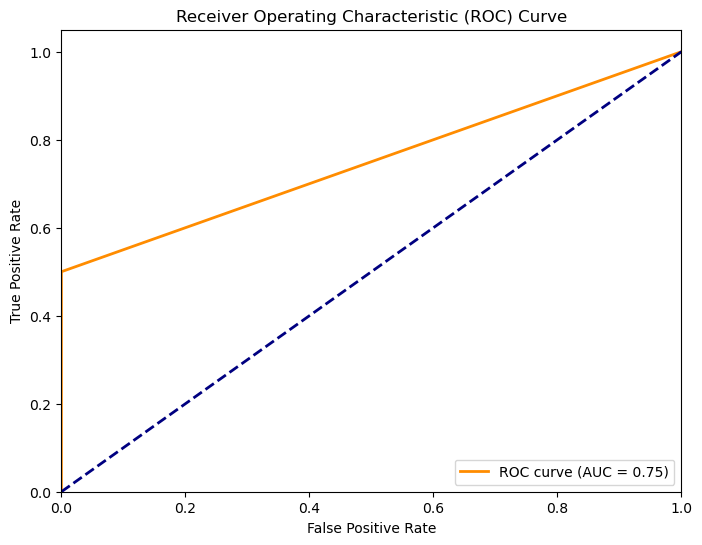

ROC AUC: 0.75


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier with a specific max_depth
clf = DecisionTreeClassifier(max_depth=1)

# Fit the decision tree on the training data
clf.fit(X_train, y_train)

# Use the trained classifier to predict probabilities on test data
predicted_probabilities = clf.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, predicted_probabilities)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score
print('ROC AUC:', roc_auc)


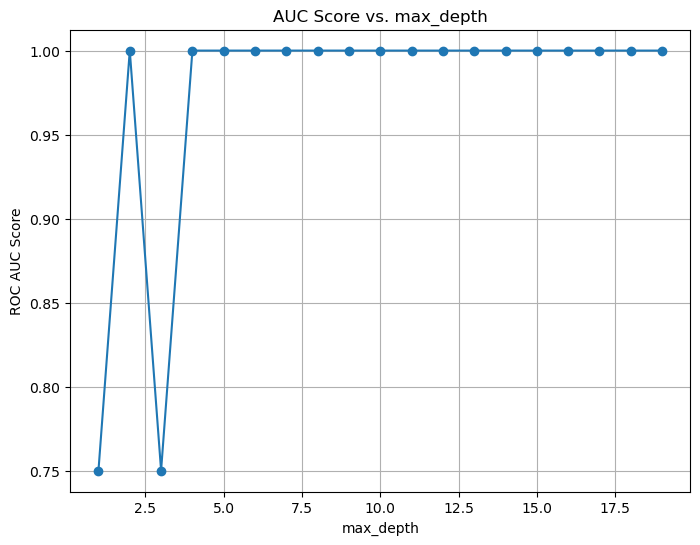

Best max_depth: 2
Best AUC Score: 1.00


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier

# Define a range of max_depth values to search
max_depth_values = range(1, 20)
auc_scores = []

for max_depth in max_depth_values:
    # Create a DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Fit the decision tree on the training data
    clf.fit(X_train, y_train)
    
    # Use the trained classifier to predict probabilities on test data
    predicted_probabilities = clf.predict_proba(X_test)[:, 1]
    
    # Calculate the ROC AUC score and store it
    auc_score = roc_auc_score(y_test, predicted_probabilities)
    auc_scores.append(auc_score)

# Find the max_depth value that results in an AUC score closest to 0.94
best_max_depth = max_depth_values[auc_scores.index(max(auc_scores))]
best_auc = max(auc_scores)

# Plot AUC scores for different max_depth values
plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, auc_scores, marker='o', linestyle='-')
plt.xlabel('max_depth')
plt.ylabel('ROC AUC Score')
plt.title('AUC Score vs. max_depth')
plt.grid(True)
plt.show()

print(f'Best max_depth: {best_max_depth}')
print(f'Best AUC Score: {best_auc:.2f}')
